In [28]:
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('data/acoes/DISB34.SA.csv')
df = df.dropna()

df.shape

(1335, 7)

In [30]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,175.470001,175.470001,175.470001,175.470001,175.470001,0
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400


In [31]:
# Obtém o preço do dia anterior
df['last_close'] = df.apply(lambda row: df['Close'].iloc[row.name - 1], axis=1)
df['last_volume'] = df.apply(lambda row: df['Volume'].iloc[row.name - 1], axis=1)
df = df.iloc[1:].copy()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200,175.470001,0
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400,182.070007,200
5,2014-01-09,182.649994,182.649994,181.130005,179.710007,179.710007,20500,179.710007,6400


In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [33]:
# Selecionando dados para treino do modelo e para validação.
train = df[ :'2018']
test = df['2019': ]

In [34]:
train.tail()

,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
Date,,,,,,,,
2018-12-20,416.980011,416.980011,413.130005,413.130005,413.130005,900,431.079987,600
2018-12-21,412.000000,412.000000,411.940002,411.940002,411.940002,1000,413.130005,900
2018-12-26,406.429993,406.429993,403.920013,403.920013,403.920013,800,411.940002,1000
2018-12-27,404.000000,404.000000,404.000000,404.000000,404.000000,100,403.920013,800
2018-12-28,416.440002,417.000000,411.209991,411.209991,411.209991,500,404.000000,100


In [35]:
test.head()

,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
Date,,,,,,,,
2019-01-02,413.309998,413.309998,413.309998,413.309998,413.309998,1500,411.209991,500
2019-01-03,413.000000,413.000000,405.000000,405.000000,405.000000,300,413.309998,1500
2019-01-04,410.619995,410.619995,410.619995,410.619995,410.619995,600,405.000000,300
2019-01-07,415.100006,417.380005,411.910004,411.910004,411.910004,1200,410.619995,600
2019-01-08,413.869995,413.869995,413.869995,413.869995,413.869995,300,411.910004,1200


In [36]:
# Colunas utlizadas para previsão do target.
features = ['Open', 'last_close', 'last_volume']
target = 'Close'

In [37]:
#x_train, y_train = train[features], train[target]
#x_test, y_test = test[features], test[target]

### Normalização dos dados

In [38]:
# Normalizador para transformar os dados do DataFrame antes da previsão.
scaler_features = MinMaxScaler(feature_range=(0,1))

x_train = pd.DataFrame(
    data= scaler_features.fit_transform(train[features]),
    columns= features
)

x_test = pd.DataFrame(
    data= scaler_features.transform(test[features]),
    columns= features
)

In [40]:
# Normalizador para transformar target  
scaler_target = MinMaxScaler(feature_range=(0,1))

y_train = scaler_target.fit_transform(train.iloc[:, 4:5])
y_test = test[target]

### Criação do modelo de Rede Neural

In [43]:
model = Sequential()

# A função de ativação será 'linear' por padrão, se não informada.
model.add(Dense(15, activation='linear', input_dim=len(features)))
model.add(Dropout(0.3))

model.add(Dense(30))
model.add(Dropout(0.3))

model.add(Dense(20))
model.add(Dropout(0.3))

model.add(Dense(1))

In [44]:
model.compile(
    optimizer='adam',
    loss='msle',
    metrics=['mae']
)

In [45]:
# Treinando do modelo
model.fit(x_train, y_train, batch_size=20, epochs=150)

Epoch 1/150
1242/1242 [==============================] - 0s 389us/step - loss: 0.0649 - mean_absolute_error: 0.3336
Epoch 2/150
1242/1242 [==============================] - 0s 73us/step - loss: 0.0221 - mean_absolute_error: 0.1818
Epoch 3/150
1242/1242 [==============================] - 0s 79us/step - loss: 0.0161 - mean_absolute_error: 0.1511
Epoch 4/150
1242/1242 [==============================] - 0s 80us/step - loss: 0.0103 - mean_absolute_error: 0.1252
Epoch 5/150
1242/1242 [==============================] - 0s 81us/step - loss: 0.0091 - mean_absolute_error: 0.1136
Epoch 6/150
1242/1242 [==============================] - 0s 79us/step - loss: 0.0076 - mean_absolute_error: 0.1059
Epoch 7/150
1242/1242 [==============================] - 0s 80us/step - loss: 0.0065 - mean_absolute_error: 0.0984
Epoch 8/150
1242/1242 [==============================] - 0s 80us/step - loss: 0.0054 - mean_absolute_error: 0.0927
Epoch 9/150
1242/1242 [==============================] - 0s 95us/step - loss: 0

1242/1242 [==============================] - 0s 98us/step - loss: 0.0020 - mean_absolute_error: 0.0490
Epoch 72/150
1242/1242 [==============================] - 0s 74us/step - loss: 0.0020 - mean_absolute_error: 0.0507
Epoch 73/150
1242/1242 [==============================] - 0s 75us/step - loss: 0.0022 - mean_absolute_error: 0.0506
Epoch 74/150
1242/1242 [==============================] - 0s 74us/step - loss: 0.0022 - mean_absolute_error: 0.0525
Epoch 75/150
1242/1242 [==============================] - 0s 140us/step - loss: 0.0019 - mean_absolute_error: 0.0487
Epoch 76/150
1242/1242 [==============================] - 0s 139us/step - loss: 0.0020 - mean_absolute_error: 0.0497
Epoch 77/150
1242/1242 [==============================] - 0s 137us/step - loss: 0.0021 - mean_absolute_error: 0.0538
Epoch 78/150
1242/1242 [==============================] - 0s 119us/step - loss: 0.0019 - mean_absolute_error: 0.0469
Epoch 79/150
1242/1242 [==============================] - 0s 76us/step - loss: 0.

1242/1242 [==============================] - 0s 96us/step - loss: 0.0018 - mean_absolute_error: 0.0485
Epoch 142/150
1242/1242 [==============================] - 0s 76us/step - loss: 0.0019 - mean_absolute_error: 0.0471
Epoch 143/150
1242/1242 [==============================] - 0s 73us/step - loss: 0.0017 - mean_absolute_error: 0.0460
Epoch 144/150
1242/1242 [==============================] - 0s 78us/step - loss: 0.0019 - mean_absolute_error: 0.0483
Epoch 145/150
1242/1242 [==============================] - 0s 74us/step - loss: 0.0019 - mean_absolute_error: 0.0467
Epoch 146/150
1242/1242 [==============================] - 0s 78us/step - loss: 0.0018 - mean_absolute_error: 0.0460
Epoch 147/150
1242/1242 [==============================] - 0s 74us/step - loss: 0.0019 - mean_absolute_error: 0.0461
Epoch 148/150
1242/1242 [==============================] - 0s 76us/step - loss: 0.0019 - mean_absolute_error: 0.0489
Epoch 149/150
1242/1242 [==============================] - 0s 71us/step - loss

In [21]:
pred = model.predict(x_test)
pred[:5]

array([[0.81975335],
       [0.81960106],
       [0.8088856 ],
       [0.8256034 ],
       [0.8220247 ]], dtype=float32)

### Análise da previsão

In [22]:
pred = scaler_target.inverse_transform(pred)
pred[:5]

array([[416.8154 ],
       [416.76962],
       [413.5466 ],
       [418.57498],
       [417.4986 ]], dtype=float32)

In [24]:
# Medir a precisão do modelo
metrics.mean_absolute_error(y_test, pred)

8.231735571989644

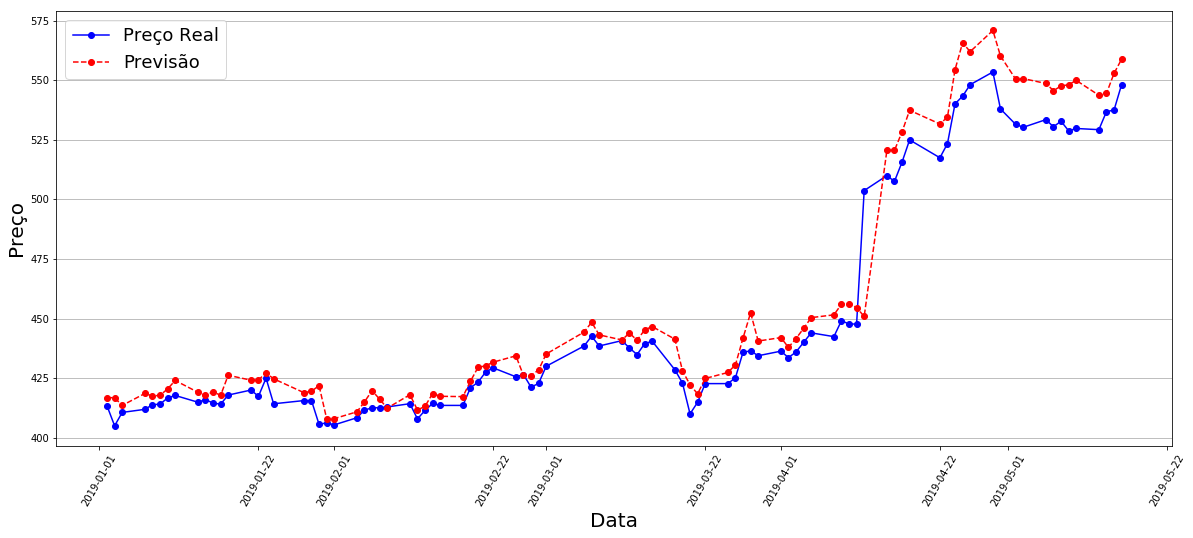

In [27]:
plt.figure(figsize=(20, 8))
plt.plot(test.index, y_test, color='blue', label='Preço Real', linestyle='-', marker='o')
plt.plot(test.index, pred, color='red', label='Previsão', linestyle='--', marker='o')

plt.legend(loc='upper left', prop={'size':18})
plt.xlabel('Data', fontdict={'size':20})
plt.ylabel('Preço', fontdict={'size':20})
plt.xticks(rotation='60')
plt.grid(axis='y')